<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/Advance_Regression/02-03-05-non-linear-s-shaped-r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# 5. S-shaped Functions or Sigmoid Models

An S-shaped or sigmoid function is a mathematical function that produces a characteristic "S" shaped curve. This type of function is used in various fields such as machine learning, neural networks, and statistics due to its property of mapping any real-valued number into a value between 0 and 1.

The most commonly used sigmoid function is the logistic function, defined as:

$$ \sigma(x) = \frac{1}{1 + e^{-x}} $$

where:

- $\sigma(x)$ is the output of the sigmoid function.
- $x$ is the input to the function.
- $e# is the base of the natural logarithm, approximately equal to 2.71828.

The logistic function has several important properties:

1. **Range**: The output of the logistic function is always between 0 and 1.
2. **Saturation**: As the input $x$ becomes very large positively, the output approaches 1. As $x$ becomes very large negatively, the output approaches 0.
3. **Symmetry**: The logistic function is symmetric around $x = 0$.
4. **Derivative**: The derivative of the logistic function can be expressed in terms of the function itself:

$$ \sigma'(x) = \sigma(x) (1 - \sigma(x)) $$

**Applications**:

1. **Neural Networks**: Sigmoid functions are used as activation functions in neural networks, helping to introduce non-linearity into the model.
2. **Logistic Regression**: In logistic regression, the sigmoid function is used to model the probability that a given input belongs to a particular class.
3. **Biology**: Sigmoid curves are often used to model population growth, enzyme kinetics, and dose-response relationships.

The sigmoid function's ability to map any real-valued number to a value between 0 and 1 makes it particularly useful in scenarios where probabilities or binary outcomes are modeled. By adjusting the parameters of the function, it can be used to represent a wide range of relationships between variables. We can use the sigmoid function to model the growth of a population over time, the response of an enzyme to substrate concentration, or the probability of an event occurring based on certain features.




### Install rpy2

In [1]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.4.2
Uninstalling rpy2-3.4.2:
  Successfully uninstalled rpy2-3.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp311-cp311-linux_x86_64.whl size=314971 sha256=f76b0132495a1f9a887323b9b9bb4d9f4ba22f1039af075c28398bbc68769e9a
  Stored in directory: /root/.cache/pip/wheels/e9/55/d1/47be85a5f3f1e1f4d1e91cb5e3a4dcb40dd72147f184c5a5ef
Successfully built rpy2


### Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Fit S-shaped  Models in R

In this tutorial, we will explore how to fit and visualize S-shaped functions in R. S-shaped functions, also known as sigmoid functions, are mathematical functions that exhibit an S-shaped curve. These functions are commonly used in various fields such as biology, economics, and machine learning to model growth, decay, and other processes that exhibit a characteristic S-shaped pattern.

## Install Rrequired R Packages

In [20]:
%%R
# Packages List
packages <- c(
  "tidyverse",   # Includes readr, dplyr, ggplot2, etc.
  'patchwork',   # for visualization
  'minpack.lm',  # for damped exponential model
  'nlstools',    # for bootstrapping
  'nls2',        # for fitting multiple models
  'broom',       # for tidying model output
  'nlsr',        # for constrained optimization
  'drc',         # for dose-response models
  'growthrates'  # for growth models
)

In [ ]:
%%R
# Install missing packages
new.packages <- packages[!(packages %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')

In [22]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

Installed packages:
  tidyverse   patchwork  minpack.lm    nlstools        nls2       broom 
       TRUE        TRUE        TRUE        TRUE        TRUE        TRUE 
       nlsr         drc growthrates 
       TRUE        TRUE        TRUE 


## Load R Packages

In [23]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Load packages with suppressed messages
invisible(lapply(packages, function(pkg) {
  suppressPackageStartupMessages(library(pkg, character.only = TRUE))
}))
# Check loaded packages
cat("Successfully loaded packages:\n")
print(search()[grepl("package:", search())])# Check loaded packages


Successfully loaded packages:
 [1] "package:growthrates" "package:deSolve"     "package:lattice"    
 [4] "package:drc"         "package:MASS"        "package:nlsr"       
 [7] "package:broom"       "package:nls2"        "package:proto"      
[10] "package:nlstools"    "package:minpack.lm"  "package:patchwork"  
[13] "package:lubridate"   "package:forcats"     "package:stringr"    
[16] "package:dplyr"       "package:purrr"       "package:readr"      
[19] "package:tidyr"       "package:tibble"      "package:ggplot2"    
[22] "package:tidyverse"   "package:tools"       "package:stats"      
[25] "package:graphics"    "package:grDevices"   "package:utils"      
[28] "package:datasets"    "package:methods"     "package:base"       


## S-shaped Functions in R

Here, we will demonstrate how to fit and plot the sigmoid function in R


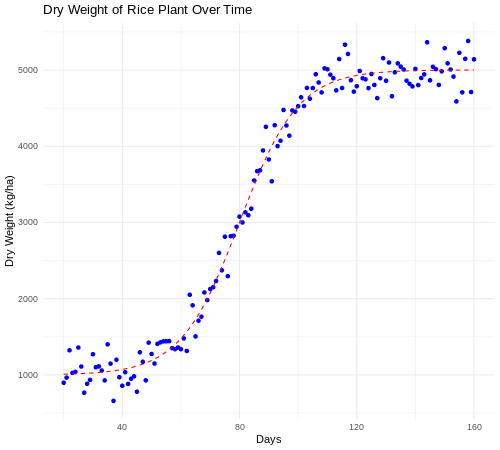

In [7]:
%%R -w 500 -h 450 -u px

# Set seed for reproducibility
set.seed(123)

# Generate days vector from 20 to 160
days <- 20:160

# Define the logistic growth function
logistic_growth <- function(x, L, k, x0) {
  L / (1 + exp(-k * (x - x0)))
}

# Parameters for the logistic function
L <- 5000  # maximum dry weight (kg/ha)
k <- 0.1   # growth rate
x0 <- 80   # mid-point of the growth

# Generate the dry weight values using the logistic growth function
dry_weight <- logistic_growth(days, L, k, x0)

# Adjust the minimum value to be 1000 kg/ha
dry_weight <- dry_weight * (4000 / max(dry_weight)) + 1000

# Add noise to the dry weight values
noise <- rnorm(length(dry_weight), mean = 0, sd = 200)
dry_weight_noisy <- dry_weight + noise

# Create a data frame
data <- data.frame(Days = days, DryWeight = dry_weight_noisy)

# Plot the data
ggplot(data, aes(x = Days, y = DryWeight)) +
  geom_point(color = "blue") +
  geom_line(aes(y = logistic_growth(Days, L, k, x0) * (4000 / max(logistic_growth(Days, L, k, x0))) + 1000), color = "red", linetype = "dashed") +
  labs(title = "Dry Weight of Rice Plant Over Time",
       x = "Days",
       y = "Dry Weight (kg/ha)") +
  theme_minimal()

##  Two-Parameter Logistic Function

The two-parameter logistic function is a simplified version of the logistic function with two parameters: the growth rate and the midpoint.

$$ f(x) = \frac{1}{1 + e^{-k(x - x_0)}} $$

where:
- $k$ is the growth rate.
- $x_0$ is the midpoint of the curve.


Below step-by-step implementation of *2-parameter logistic in R


### Define the 2PL Function  

The **2-parameter logistic (2PL) function** is an S-shaped curve defined by two parameters:  
- **a** (slope/discrimination parameter, controlling steepness)  
- **b** (location/difficulty parameter, midpoint where the response is 0.5).  

In [8]:
%%R
logistic_2pl <- function(x, a, b) {
  1 / (1 + exp(-a * (x - b)))
}


### Generate Synthetic Data

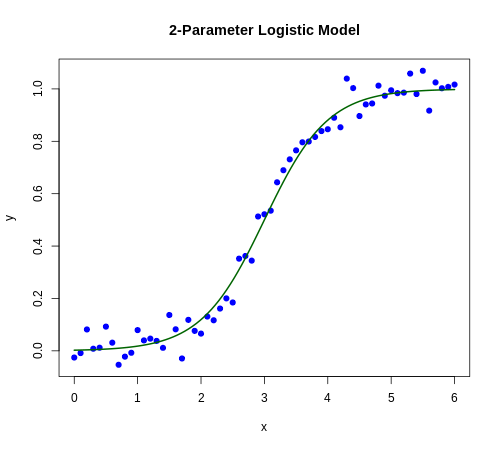

In [30]:
%%R -w 500 -h 450 -u px
set.seed(123)
a_true <- 2   # True slope parameter
b_true <- 3   # True midpoint parameter
x <- seq(0, 6, by = 0.1)
y <- logistic_2pl(x, a_true, b_true) + rnorm(length(x), sd = 0.05)  # Add noise
# plot the data
plot(x, y, pch = 19, col = "blue", main = "2-Parameter Logistic Model", xlab = "x", ylab = "y")
curve(logistic_2pl(x, a_true, b_true), add = TRUE, lwd = 2, col = "darkgreen")  # True curve

### Fit the Model Using Nonlinear Least Squares (`nls`)

In [10]:
%%R -w 500 -h 450 -u px
fit <- nls(y ~ 1 / (1 + exp(-a * (x - b))),
          start = list(a = 1, b = 2))  # Provide reasonable starting guesses
summary(fit)  # View estimated parameters



Formula: y ~ 1/(1 + exp(-a * (x - b)))

Parameters:
  Estimate Std. Error t value Pr(>|t|)    
a  2.14324    0.09593   22.34   <2e-16 ***
b  2.99463    0.02371  126.29   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04482 on 59 degrees of freedom

Number of iterations to convergence: 7 
Achieved convergence tolerance: 2.646e-06



### Plot the Fitted Model

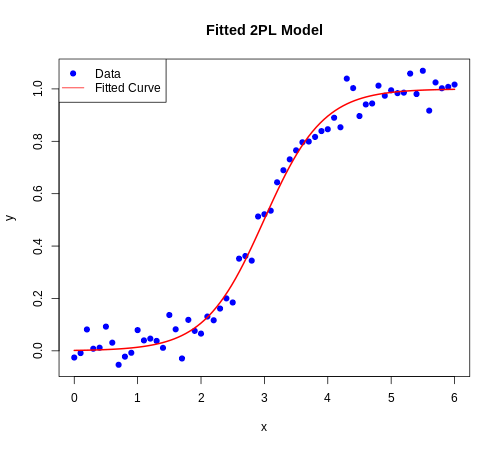

In [11]:
%%R -w 500 -h 450 -u px
# Prediction
x_pred <- seq(min(x), max(x), length.out = 100)
y_pred <- predict(fit, newdata = data.frame(x = x_pred))

plot(x, y, pch = 19, col = "blue", main = "Fitted 2PL Model", xlab = "x", ylab = "y")
lines(x_pred, y_pred, col = "red", lwd = 2)
legend("topleft", legend = c("Data", "Fitted Curve"),
       col = c("blue", "red"), pch = c(19, NA), lty = c(NA, 1))

## Three-Parameter Logistic Function

The three-parameter logistic function adds a third parameter to account for the asymptote.

$$ f(x) = \frac{A}{1 + e^{-k(x - x_0)}} $$

where:
- $A$ is the maximum value (asymptote).
- $k$ is the growth rate.
- $x_0$ is the midpoint of the curve.

### Define the 3PL Function  

Parameters:  
- **a**: Slope/discrimination (steepness)  
- **b**: Location/difficulty (midpoint)  
- **c**: Lower asymptote (baseline probability when \( x \to -\infty \))

### Define the 3PL Function  

Parameters:  
- **a**: Slope/discrimination (steepness)  
- **b**: Location/difficulty (midpoint)  
- **c**: Lower asymptote (baseline probability when \( x \to -\infty \))  

In [13]:
%%R
logistic_3pl <- function(x, a, b, c) {
  c + (1 - c) / (1 + exp(-a * (x - b)))
}

### Generate Synthetic Data  

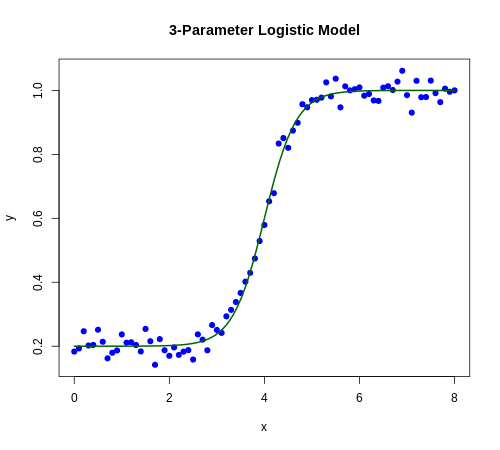

In [29]:
%%R -w 500 -h 450 -u px
# Simulating some data
set.seed(123)
a_true <- 3    # True slope
b_true <- 4    # True midpoint
c_true <- 0.2  # True lower asymptote (e.g., 20% guessing probability)
x <- seq(0, 8, by = 0.1)
y <- logistic_3pl(x, a_true, b_true, c_true) + rnorm(length(x), sd = 0.03)  # Add noise
# plot the data
plot(x, y, pch = 19, col = "blue", main = "3-Parameter Logistic Model", xlab = "x", ylab = "y")
curve(logistic_3pl(x, a_true, b_true, c_true), add = TRUE, lwd = 2, col = "darkgreen")  # True curve

### Fit Using Manual Starting Values

   - Estimate starting values:
     - $a_0$: Slightly above the maximum observed $y$ (e.g., $\text{max}(y) + 5$)
     - Linearize $\ln(a_0 - y) = \ln(b) - c \cdot x$ to estimate $b_0$ and $c_0$

In [ ]:
%%R
   # Estimate starting values
   max_y <- max(data.3$y)
   a0 <- max_y + 5  # Adjust based on data
   z <- log(a0 - data.3$y)
   lin_model <- lm(z ~ data.3$x)
   b0 <- exp(coef(lin_model)[1])
   c0 <- -coef(lin_model)[2]

   # Fit the Model with `nls()`**
  fit.3<- nls(y ~ a - b * exp(-c * x),
                data = data.3,
                start = list(a = a0, b = b0, c = c0))
   summary(fit.3)


Formula: y ~ a - b * exp(-c * x)

Parameters:
  Estimate Std. Error t value Pr(>|t|)    
a  8.16864    0.50583  16.149 8.49e-07 ***
b  9.00788    0.51245  17.578 4.75e-07 ***
c  0.26969    0.05218   5.169   0.0013 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3512 on 7 degrees of freedom

Number of iterations to convergence: 7 
Achieved convergence tolerance: 8.369e-07



### Fit the Model Using `nls`  

Use bounds for parameter `c` (e.g., $0 \leq c \leq 1$):  

In [15]:
%%R
fit <- nls(y ~ c + (1 - c)/(1 + exp(-a * (x - b))),
          start = list(a = 1, b = 2, c = 0.1),
          lower = list(a = 0.1, b = -Inf, c = 0),
          upper = list(a = Inf, b = Inf, c = 0.5),
          algorithm = "port")  # Constrained optimization

summary(fit)  # View parameter estimates


Formula: y ~ c + (1 - c)/(1 + exp(-a * (x - b)))

Parameters:
  Estimate Std. Error t value Pr(>|t|)    
a  2.94569    0.12812   22.99   <2e-16 ***
b  3.99373    0.01707  234.00   <2e-16 ***
c  0.19976    0.00526   37.98   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02784 on 78 degrees of freedom

Algorithm "port", convergence message: both X-convergence and relative convergence (5)



### Plot the Fitted Model

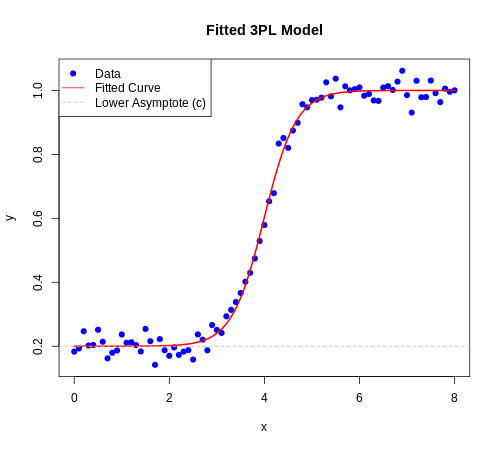

In [16]:
%%R -w 500 -h 450 -u px
x_pred <- seq(min(x), max(x), length.out = 100)
y_pred <- predict(fit, newdata = data.frame(x = x_pred))

plot(x, y, pch = 19, col = "blue", main = "Fitted 3PL Model", xlab = "x", ylab = "y")
lines(x_pred, y_pred, col = "red", lwd = 2)
abline(h = coef(fit)["c"], lty = 2, col = "gray")  # Plot lower asymptote
legend("topleft", legend = c("Data", "Fitted Curve", "Lower Asymptote (c)"),
       col = c("blue", "red", "gray"), pch = c(19, NA, NA), lty = c(NA, 1, 2))

## Four-Parameter Logistic Function

The four-parameter logistic function includes an additional parameter to adjust the minimum value.

$$ f(x) = A + \frac{(B - A)}{1 + e^{-k(x - x_0)}} $$

where:
- $A$ is the minimum value (lower asymptote).
- $B$ is the maximum value (upper asymptote).
- $k$ is the growth rate.
- $x_0$ is the midpoint of the curve.



### Define the 4PL Function  

The **4-parameter logistic (4PL) function** extends the 3PL model by adding an **upper asymptote parameter (d)**, allowing the curve to approach a value other than 1. It is widely used in dose-response studies, bioassays, and growth modeling. The formula is:  

In [17]:
%%R
logistic_4pl <- function(x, a, b, c, d) {
  c + (d - c) / (1 + exp(-a * (x - b)))
}

### Generate Synthetic Data  

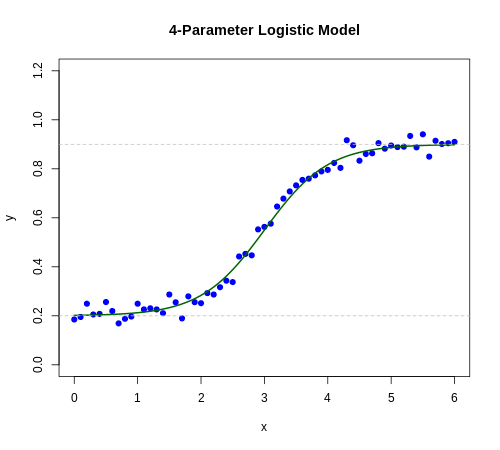

In [28]:
%%R -w 500 -h 450 -u px
set.seed(123)
a_true <- 2    # True slope
b_true <- 3    # True midpoint
c_true <- 0.2  # True lower asymptote
d_true <- 0.9  # True upper asymptote (not 1!)
x <- seq(0, 6, by = 0.1)
y <- logistic_4pl(x, a_true, b_true, c_true, d_true) + rnorm(length(x), sd = 0.03)  # Add noise
# plot the data
plot(x, y, pch = 19, col = "blue", main = "4-Parameter Logistic Model",
     xlab = "x", ylab = "y", ylim = c(0, 1.2))
curve(logistic_4pl(x, a_true, b_true, c_true, d_true), add = TRUE, lwd = 2, col = "darkgreen")  # True curve
abline(h = c(c_true, d_true), lty = 2, col = "gray")  # Plot asymptotes

### Fit the model

#### Option 1: Using `nls` (Nonlinear Least Squares)  
Use constraints for $c$ and $d$ (e.g., $ 0 \leq c \leq d \leq 1 $):

In [25]:
%%R -w 500 -h 450 -u px
# Provide reasonable starting guesses (critical for convergence)
fit <- nls(y ~ c + (d - c)/(1 + exp(-a * (x - b))),
          start = list(a = 1, b = 3, c = 0.1, d = 0.8),
          lower = list(a = 0.1, b = -Inf, c = 0, d = 0.5),
          upper = list(a = 5, b = Inf, c = 0.3, d = 1),
          algorithm = "port")  # Use "port" algorithm for bounds

summary(fit)  # View parameter estimates


Formula: y ~ c + (d - c)/(1 + exp(-a * (x - b)))

Parameters:
  Estimate Std. Error t value Pr(>|t|)    
a 2.178090   0.119456   18.23   <2e-16 ***
b 3.006462   0.027759  108.31   <2e-16 ***
c 0.206874   0.007416   27.89   <2e-16 ***
d 0.898834   0.007449  120.66   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02716 on 57 degrees of freedom

Algorithm "port", convergence message: relative convergence (4)



#### Option 2: Using the `drc` Package

The `drc` package provides a more straightforward interface for fitting dose-response models, including the 4PL model.  

In [26]:
%%R
fit_drc <- drm(y ~ x, data = data.frame(x, y),
              fct = L.4(fixed = c(NA, NA, NA, NA)))  # 4PL model
summary(fit_drc)  # Clean output with parameter names: b, c, d, e (slope, lower, upper, midpoint)


Model fitted: Logistic (ED50 as parameter) (4 parms)

Parameter estimates:

                Estimate Std. Error t-value   p-value    
b:(Intercept) -2.1781753  0.1230503 -17.701 < 2.2e-16 ***
c:(Intercept)  0.2068784  0.0073609  28.105 < 2.2e-16 ***
d:(Intercept)  0.8988279  0.0076342 117.736 < 2.2e-16 ***
e:(Intercept)  3.0064585  0.0277626 108.291 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error:

 0.02715902 (57 degrees of freedom)


###  Plot the Fitted Curve  

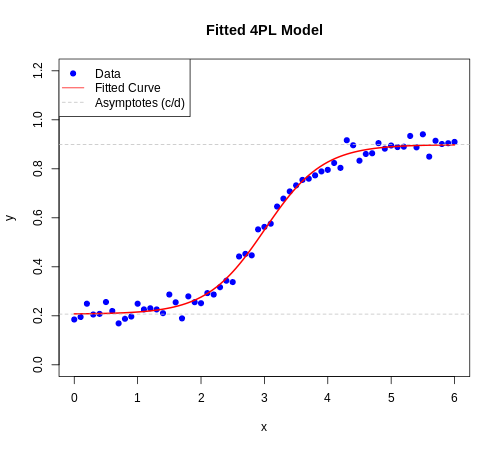

In [27]:
%%R -w 500 -h 450 -u px
x_pred <- seq(min(x), max(x), length.out = 100)
y_pred <- predict(fit, newdata = data.frame(x = x_pred))  # For `nls` output
# OR: y_pred <- predict(fit_drc, newdata = data.frame(x = x_pred))  # For `drc` output

plot(x, y, pch = 19, col = "blue", main = "Fitted 4PL Model",
     xlab = "x", ylab = "y", ylim = c(0, 1.2))
lines(x_pred, y_pred, col = "red", lwd = 2)
abline(h = c(coef(fit)[["c"]], coef(fit)[["d"]]), lty = 2, col = "gray")  # Fitted asymptotes
legend("topleft", legend = c("Data", "Fitted Curve", "Asymptotes (c/d)"),
       col = c("blue", "red", "gray"), pch = c(19, NA, NA), lty = c(NA, 1, 2))

##  Weibull Function

The Weibull function is commonly used to model the distribution of lifetimes of products or components, where the probability of failure increases over time. It can also be used to model other phenomena where the rate of change is not constant. The Weibull function is a versatile model used in survival analysis, reliability engineering, and dose-response studies. Its cumulative distribution function (CDF) is S-shaped and defined by two parameters:  

- **Shape (k)**: Controls the steepness and direction of the curve.  
  - $k < 1$: Decreasing hazard rate (e.g., early failures).  
  - $k = 1$: Exponential distribution (constant hazard rate).  
  - $k > 1$: Increasing hazard rate (e.g., wear-out failures).  
- **Scale (λ)**: Determines the spread of the distribution (larger λ = wider spread).  

The **Weibull CDF** is:  

$$ f(x) = 1 - e^{-(x/\lambda)^k} $$

### Define the Weibull Function (CDF)

In [31]:
%%R
weibull_cdf <- function(x, k, lambda) {
  1 - exp(-(x / lambda)^k)
}

### Generate Synthetic Data  

In [32]:
%%R
set.seed(123)
k_true <- 2.5    # True shape parameter
lambda_true <- 3 # True scale parameter
x <- seq(0, 10, by = 0.5)
y <- weibull_cdf(x, k_true, lambda_true) + rnorm(length(x), sd = 0.05)  # Add noise
y <- pmax(pmin(y, 1), 0)  # Clip values between 0 and 1

### Plot the Data

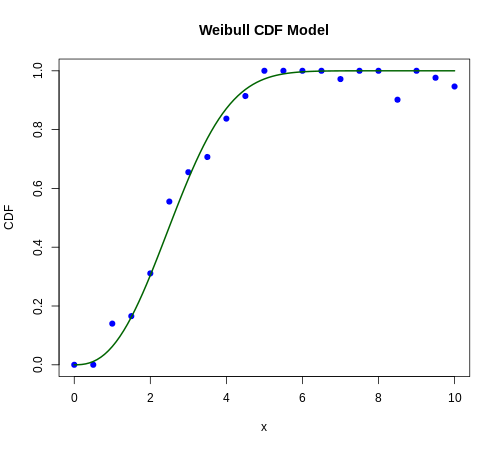

In [34]:
%%R -w 500 -h 450 -u px
plot(x, y, pch = 19, col = "blue", main = "Weibull CDF Model", xlab = "x", ylab = "CDF")
curve(weibull_cdf(x, k_true, lambda_true), add = TRUE, lwd = 2, col = "darkgreen")  # True curve

### Fit the Model  

### Option 1: Nonlinear Least Squares (`nls`)  

In [35]:
%%R
fit_nls <- nls(y ~ 1 - exp(-(x / lambda)^k),
              start = list(k = 1, lambda = 5),  # Critical starting guesses
              lower = list(k = 0.1, lambda = 0.1),
              upper = list(k = 10, lambda = 10),
              algorithm = "port")  # Use "port" for bounds

summary(fit_nls)  # Estimated parameters


Formula: y ~ 1 - exp(-(x/lambda)^k)

Parameters:
       Estimate Std. Error t value Pr(>|t|)    
k       2.19027    0.15028   14.57 9.12e-12 ***
lambda  2.97249    0.06591   45.10  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03878 on 19 degrees of freedom

Algorithm "port", convergence message: relative convergence (4)



#### Option 2: Using the `drc` Package

In [ ]:
%%R
best_model <- names(which.min(metrics$AIC))
cat("Best model is:", best_model, "with AIC value:", min(metrics$AIC), "\n")


Best model is: with AIC value: 429.8244 


### Plot the Fitted Curve  

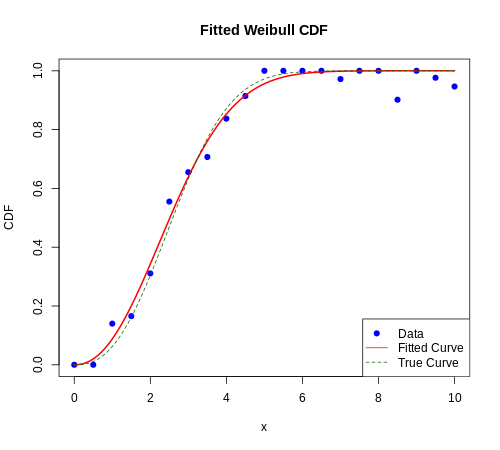

In [36]:
%%R -w 500 -h 450 -u px
x_pred <- seq(min(x), max(x), length.out = 100)
y_pred_nls <- predict(fit_nls, newdata = data.frame(x = x_pred))
# OR: y_pred_drc <- predict(fit_drc, newdata = data.frame(x = x_pred))

plot(x, y, pch = 19, col = "blue", main = "Fitted Weibull CDF", xlab = "x", ylab = "CDF")
lines(x_pred, y_pred_nls, col = "red", lwd = 2)  # `nls` prediction
curve(weibull_cdf(x, k_true, lambda_true), add = TRUE, lty = 2, col = "darkgreen")  # True curve
legend("bottomright", legend = c("Data", "Fitted Curve", "True Curve"),
       col = c("blue", "red", "darkgreen"), pch = c(19, NA, NA), lty = c(NA, 1, 2))

## Gompertz Function

The Gompertz function is an asymmetric sigmoid curve used to model growth processes (e.g., tumor growth, population dynamics, or product adoption). It is defined by three parameters:  

- **a**: Upper asymptote (maximum value).  
- **b**: Displacement parameter (shifts the curve horizontally).  
- **c**: Growth rate (controls the steepness).  

Its mathematical form is:  
$$ f(x) = a \cdot e^{-b \cdot e^{-c \cdot x}} $$

### Define the Gompertz Function  

In [37]:
%%R
gompertz <- function(x, a, b, c) {
  a * exp(-b * exp(-c * x))
}

### Generate Synthetic Data  

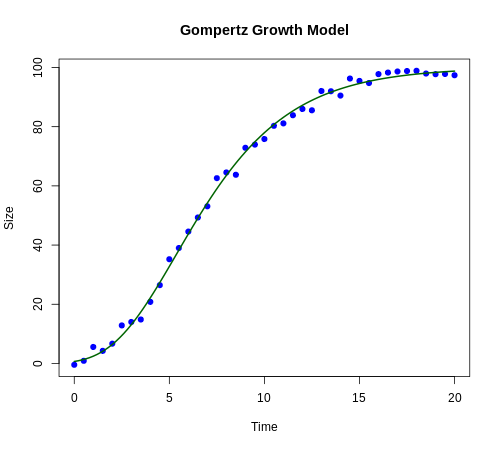

In [39]:
%%R -w 500 -h 450 -u px
set.seed(123)
a_true <- 100   # Upper asymptote
b_true <- 5     # Displacement parameter
c_true <- 0.3   # Growth rate
x <- seq(0, 20, by = 0.5)
y <- gompertz(x, a_true, b_true, c_true) + rnorm(length(x), sd = 2)  # Add noise

plot(x, y, pch = 19, col = "blue", main = "Gompertz Growth Model", xlab = "Time", ylab = "Size")
curve(gompertz(x, a_true, b_true, c_true), add = TRUE, lwd = 2, col = "darkgreen")  # True curve

### Fit the Model  



#### Option 1: Nonlinear Least Squares (`nls`)  

In [40]:
%%R
fit_nls <- nls(y ~ a * exp(-b * exp(-c * x)),
              start = list(a = 90, b = 4, c = 0.2),  # Critical starting guesses
              control = nls.control(maxiter = 500))  # Increase iterations if needed
summary(fit_nls)


Formula: y ~ a * exp(-b * exp(-c * x))

Parameters:
   Estimate Std. Error t value Pr(>|t|)    
a 1.006e+02  7.033e-01  143.09   <2e-16 ***
b 4.714e+00  1.868e-01   25.23   <2e-16 ***
c 2.889e-01  7.356e-03   39.28   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.784 on 38 degrees of freedom

Number of iterations to convergence: 4 
Achieved convergence tolerance: 2.475e-06



#### Option 2: Using the `growthrates` Package

In [41]:
%%R
fit_growth <- fit_growthmodel(FUN = grow_gompertz,
                             p = c(y0 = 1, mumax = 0.3, K = 100),  # Parameters: initial size, growth rate, asymptote
                             time = x,
                             y = y)
summary(fit_growth)


Parameters:
       Estimate Std. Error t value Pr(>|t|)    
y0    9.023e-01  1.720e-01   5.246 6.15e-06 ***
mumax 2.889e-01  7.356e-03  39.279  < 2e-16 ***
K     1.006e+02  7.033e-01 143.086  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.784 on 38 degrees of freedom

Parameter correlation:
           y0   mumax       K
y0     1.0000 -0.9215  0.5571
mumax -0.9215  1.0000 -0.7480
K      0.5571 -0.7480  1.0000


### Plot the Fitted Curve  


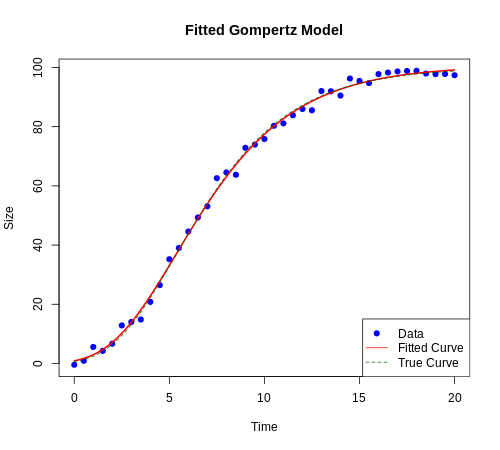

In [42]:
%%R -w 500 -h 450 -u px
# Prediction
x_pred <- seq(min(x), max(x), length.out = 100)
y_pred <- predict(fit_nls, newdata = data.frame(x = x_pred))

plot(x, y, pch = 19, col = "blue", main = "Fitted Gompertz Model", xlab = "Time", ylab = "Size")
lines(x_pred, y_pred, col = "red", lwd = 2)  # Fitted curve
curve(gompertz(x, a_true, b_true, c_true), add = TRUE, lty = 2, col = "darkgreen")  # True curve
legend("bottomright", legend = c("Data", "Fitted Curve", "True Curve"),
       col = c("blue", "red", "darkgreen"), pch = c(19, NA, NA), lty = c(NA, 1, 2))

## Summary and Conclusion

This tutorial explored the implementation, fitting, and visualization of **nonlinear functions** in R, focusing  on diffrenty types of  S-shaped or sigmoid models. These models are usefull in various fields such as machine learning, neural networks, and statistics due to its property of mapping any real-valued number into a value between 0 and 1. By combining base R functions (`nls`, `plot`) with specialized packages (`drc`, `growthrates`), users can efficiently tackle complex modeling tasks. The workflow—defining equations, simulating data, fitting parameters, and validating results—equips researchers to analyze real-world phenomena, from drug efficacy to population dynamics. Future work could extend to hierarchical models, Bayesian fitting (e.g., `brms`), or machine learning hybrids for higher-dimensional data.   The tutorial underscores R’s versatility as a tool for both exploratory and confirmatory nonlinear modeling.

## References

1. **[Sigmoid function - Wikipedia](https://en.wikipedia.org/wiki/Sigmoid_function)**
   - Explanation of sigmoid functions and their characteristic S-shaped curve.
   
2. **[S-Shaped Curve - Fiveable](https://library.fiveable.me/key-terms/calc-ii/s-shaped-curve)**
   - Definition and explanations of S-shaped curves, often observed in natural and social phenomena.
   
3. **[S-shaped Functions - MetaSD](https://metasd.com/2020/02/s-shaped-functions/)**
   - Collection of small models using sigmoid functions with S-shaped characteristics.

4. **[Fit Sigmoidal Models - MathWorks](https://www.mathworks.com/help/curvefit/sigmoidal.html)**
   - Information on fitting sigmoidal models such as logistic and Gompertz functions.

5. **[S-shaped MF - MathWorks](https://www.mathworks.com/help/fuzzy/sshapedmf.html)**
   - Description of S-shaped membership functions used in fuzzy logic.

6. **[V4L2 Device Sub-devices](https://github.com/github/linux/blob/c68a2cf07ad726c09a8724258e25ca9400fdf9ee/Documentation/media/uapi/v4l/dev-subdev.rst#L1-L93)**
   - Documentation about sub-devices in V4L2, which might be useful for understanding complex device structures.



